https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

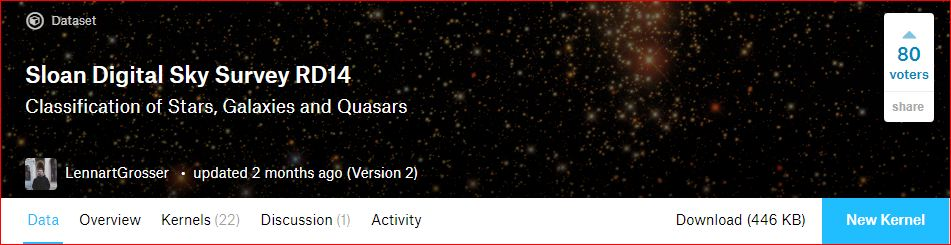

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/urwinday/2c9901cff2cdb0c47a291b34a0db2805/raw/ebb0d489d6b0f78c81403c1a4d54ad54397e4d8c/Skyserver_SQL2_27_2018%25206_51_39%2520PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [4]:
df['class'] = df['class'].map({'STAR': 1, 'GALAXY': 2, 'QSO': 3})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null int64
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


[[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C517048>]]


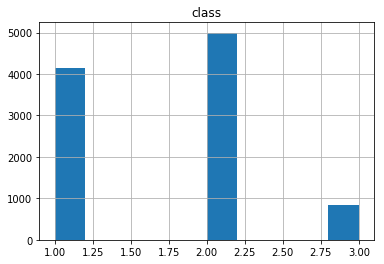

In [7]:
print(df.hist('class'));

### Демонстрация многоклассовой классификации 
- с помощью алгоритма DecisionTreeClassifier
- оценка accuracy.

In [8]:
# выделяем целевой признак y
y =  df['class']

In [9]:
X = df.drop('class', axis=1)

In [10]:
X.shape, y.shape

((10000, 17), (10000,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# разбиваем на две подвыборки 70% и 30%
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

In [13]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((7500, 17), (2500, 17), (7500,), (2500,))

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
# создаём экземпляр DTC
first_tree = DecisionTreeClassifier()

In [16]:
# подгоняем классификатор, используя обучающий набор
first_tree.fit( X_train, y_train );

In [17]:
# Прогнозы на тестовом наборе
y_pred = first_tree.predict( X_valid )
y_pred 

array([1, 3, 2, ..., 2, 1, 2], dtype=int64)

In [18]:
# Правильность на тестовом наборе
first_tree.score( X_valid, y_valid ) 

0.986

In [19]:
import numpy as np

In [20]:
# Правильность на тестовом наборе
np.mean( y_pred == y_valid )

0.986

In [21]:
y_pred == y_valid;

In [22]:
# явно импортируем метрику
from sklearn.metrics import accuracy_score

In [23]:
# рекомендуемый способ вычисления метрик
accuracy_score(y_pred, y_valid)

0.986

### Использование кросс-валидации

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# качество на кросс-валидации
# estimator - наша модель, передаём наше дерево
cross_val_score(first_tree, X_train, y_train, cv=5)

array([0.98201199, 0.98134577, 0.988     , 0.98065377, 0.9826551 ])

In [26]:
# считаем среднюю на кросc-валидации
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9832003492742294

### Использование гиперпараметров, связанных со сложностью модели
### График accuracy для train set и test_set для разных значений гиперпараметра

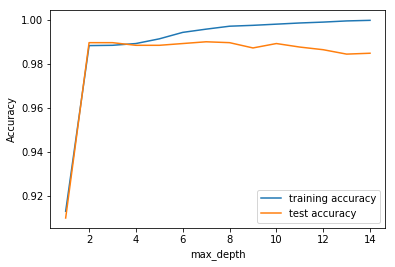

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 10
tree_settings = range(1, 15)
for max_depth in tree_settings:
    # build the model
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(tree.score(X_valid, y_valid))

plt.plot(tree_settings, training_accuracy, label="training accuracy")
plt.plot(tree_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

### Демонстрация бинарной классификации, 
 - с метриками: accuracy, precision, recall, f-measure, 
 - а также classification_report

https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star

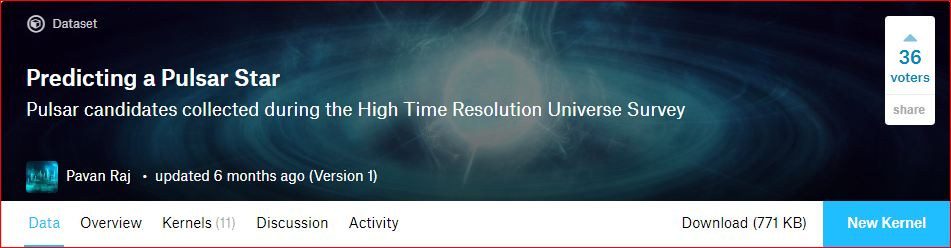

In [28]:
df2 = pd.read_csv('data/pulsar_stars.csv')
df2.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [29]:
y2 =  df2['target_class']

In [30]:
X2 = df2.drop('target_class', axis=1)

In [31]:
X2.shape, y2.shape

((17898, 8), (17898,))

In [32]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y2, random_state = 0)

In [33]:
second_tree = DecisionTreeClassifier()

In [34]:
second_tree.fit( X_train2, y_train2 );

In [35]:
y_pred2 = second_tree.predict( X_valid2 )
y_pred2 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
accuracy_score(y_pred2, y_valid2)

0.9716201117318436

### Подсчёт метрик: 
### precision, recall, f-measure, а также classification_report

In [37]:
print(sklearn.metrics.classification_report(y_pred2, y_valid2))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      4110
          1       0.83      0.82      0.82       365

avg / total       0.97      0.97      0.97      4475

